# Visualizing and Animating positions

In [1]:
## Load in some dependencies
library(dplyr); library(data.table); library(ggplot2); library(ggforce)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last




In [3]:
nhwl_df <- read.csv("../input/nhwldata/Rotman MMA Summer Datathon NWHL.csv")
head(nhwl_df)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,Event,X.Coordinate,Y.Coordinate,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,20:00,5,5,0,0,Boston Pride,⋯,Faceoff Win,100,43,Backhand,,,,Stephanie Anderson,NA,NA
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:58,5,5,0,0,Boston Pride,⋯,Puck Recovery,107,40,,,,,,NA,NA
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:57,5,5,0,0,Boston Pride,⋯,Zone Entry,125,28,Carried,,,,Maddie Rowe,NA,NA
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,⋯,Shot,131,28,Snapshot,On Net,t,f,,NA,NA
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:53,5,5,0,0,Boston Pride,⋯,Faceoff Win,169,21,Backhand,,,,Stephanie Anderson,NA,NA
6,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:52,5,5,0,0,Boston Pride,⋯,Puck Recovery,159,26,,,,,,NA,NA


In [36]:
image <- jpeg::readJPEG("../input/ice-hockey-half-rink/ice_hockey_half_rink.jpg")
image2 <- png::readPNG("../input/half-rink-bw/ice-hockey-rink-half-bw.png")
image3 <- png::readPNG("../input/full-rink-bw/ice-hockey-rink-bw.png")

In [35]:
nhwl_plays_df <- nhwl_df %>%
  filter(Event %in% c("Play", "Incomplete Play"), Detail.1 == "Direct") %>%
#, X.Coordinate >= 125, X.Coordinate.2 >= 125
  mutate(start_x = Y.Coordinate,
         start_y = X.Coordinate,
         end_x = Y.Coordinate.2,
         end_y = X.Coordinate.2,
         
         delta_x = end_x - start_x,
         delta_y = end_y - start_y,
         
         is_complete = ifelse(Event == "Play", 1, 0))

head(nhwl_plays_df,10)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,Player.2,X.Coordinate.2,Y.Coordinate.2,start_x,start_y,end_x,end_y,delta_x,delta_y,is_complete
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:43,5,5,0,0,Minnesota Whitecaps,⋯,Haley Mack,196,33,20,193,33,196,13,3,1
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:40,5,5,0,0,Boston Pride,⋯,Taylor Wenczkowski,37,70,49,3,70,37,21,34,1
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:28,5,5,0,0,Boston Pride,⋯,Taylor Wenczkowski,61,85,33,12,85,61,52,49,1
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:12,5,5,0,0,Minnesota Whitecaps,⋯,Nina Rodgers,105,45,80,79,45,105,-35,26,1
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:09,5,5,0,0,Minnesota Whitecaps,⋯,Allie Thunstrom,134,8,24,118,8,134,-16,16,1
6,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:08,5,5,0,0,Minnesota Whitecaps,⋯,Nina Rodgers,161,14,10,168,14,161,4,-7,1
7,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:51,5,5,0,0,Boston Pride,⋯,McKenna Brand,175,47,65,195,47,175,-18,-20,0
8,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:44,5,5,0,0,Minnesota Whitecaps,⋯,Haylea Schmid,50,44,1,50,44,50,43,0,1
9,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:41,5,5,0,0,Minnesota Whitecaps,⋯,Nina Rodgers,88,5,30,80,5,88,-25,8,0


In [ ]:
# nhwl_plays_df <- nhwl_plays_df[nhwl_plays_df$Player == 'Taylor Woods', ]
# nhwl_plays_df <- nhwl_plays_df[nhwl_plays_df$Period == 2, ]
# nhwl_plays_df <- nhwl_plays_df[nhwl_plays_df$game_date == '2021-01-31', ]
# nhwl_plays_df

## Clustering

In [5]:
cluster_fit <- kmeans(nhwl_plays_df %>% select(start_x: delta_y), centers = 50)
nhwl_plays_df$cluster <- cluster_fit$cluster

In [6]:
cluster_summary <- nhwl_plays_df %>%
  group_by(cluster) %>%
  summarise(total_passes = n(),
            comp_rate = mean(is_complete))

risky_passes <- (cluster_summary %>%
                   arrange(comp_rate) %>%
                   .$cluster)[1:3]

safe_passes <- (cluster_summary %>%
                   arrange(desc(comp_rate)) %>%
                   .$cluster)[1:3]

## Plotting static clusters

In [7]:
# Plot clusters
risky_dat <- bind_rows(nhwl_plays_df %>%
                         filter(cluster == risky_passes[1]) %>%
                         sample_n(20, replace = FALSE),
                       nhwl_plays_df %>%
                         filter(cluster == risky_passes[2]) %>%
                         sample_n(20, replace = FALSE),
                       nhwl_plays_df %>%
                         filter(cluster == risky_passes[3]) %>%
                         sample_n(20, replace = FALSE))


risky_passes_plot <- ggplot(data = risky_dat, aes(end_x, end_y, col = factor(cluster))) + 
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.3, "cm"))) +
  geom_circle(data = data.frame(x0 = 42.5, y0 = 100, r = 15), aes(x0 = x0, y0 = y0, r = r), 
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 20.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 64.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_point(inherit.aes = FALSE, aes(x = 42.5, y = 100),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 120),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 120),
             col = "gray50", size = 1) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 0, y = 189, xend = 85, yend = 189)) +
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 45.5, yend = 192.5)) + 
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 39.5, yend = 189)) +  
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 45.5, y = 192.5, xend = 45.5, yend = 189)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 33.5, y = 189, xend = 28.5, yend = 200)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 51.5, y = 189, xend = 56.5, yend = 200)) +
  geom_hline(col = "gray50", yintercept = 125, lwd = 0.5) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0,0)) +
  ylab("OFFENSIVE ZONE") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y = element_text(size=12),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        panel.border = element_rect(colour = "gray50", fill=NA, size=0.2)) +
  coord_fixed(xlim = c(0,85), ylim = c(100,200)) +
  annotate("label", x = 42.5, y = 112.5, label = "Risky Passes", size = 5.5, fill = "mistyrose")


safe_dat <- bind_rows(nhwl_plays_df %>%
                        filter(cluster == safe_passes[1]) %>%
                        sample_n(20, replace = FALSE),
                      nhwl_plays_df %>%
                        filter(cluster == safe_passes[2]) %>%
                        sample_n(20, replace = FALSE),
                      nhwl_plays_df %>%
                        filter(cluster == safe_passes[3]) %>%
                        sample_n(20, replace = FALSE))


safe_passes_plot <- ggplot(data = safe_dat, aes(end_x, end_y, col = factor(cluster))) + 
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.3, "cm"))) +
  geom_circle(data = data.frame(x0 = 42.5, y0 = 100, r = 15), aes(x0 = x0, y0 = y0, r = r), 
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 20.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_circle(data = data.frame(x0 = 64.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
              lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
  geom_point(inherit.aes = FALSE, aes(x = 42.5, y = 100),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 169),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 120),
             col = "gray50", size = 1) +
  geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 120),
             col = "gray50", size = 1) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 0, y = 189, xend = 85, yend = 189)) +
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 45.5, yend = 192.5)) + 
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 39.5, yend = 189)) +  
  geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 45.5, y = 192.5, xend = 45.5, yend = 189)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 33.5, y = 189, xend = 28.5, yend = 200)) +
  geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 51.5, y = 189, xend = 56.5, yend = 200)) +
  geom_hline(col = "gray50", yintercept = 125, lwd = 0.5) +
  scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0,0)) +
  ylab("OFFENSIVE ZONE") +
  theme(axis.title.x=element_blank(),
        axis.text.x=element_blank(),
        axis.ticks.x=element_blank(),
        axis.title.y = element_text(size=12),
        axis.text.y=element_blank(),
        axis.ticks.y=element_blank(), 
        panel.grid.major = element_blank(), 
        panel.grid.minor = element_blank(),
        panel.background = element_blank(),
        panel.border = element_rect(colour = "gray50", fill=NA, size=0.2)) +
  coord_fixed(xlim = c(0,85), ylim = c(100,200)) +
  annotate("label", x = 42.5, y = 112.5, label = "Safe Passes", size = 5.5, fill = "azure")

Risky passes: 

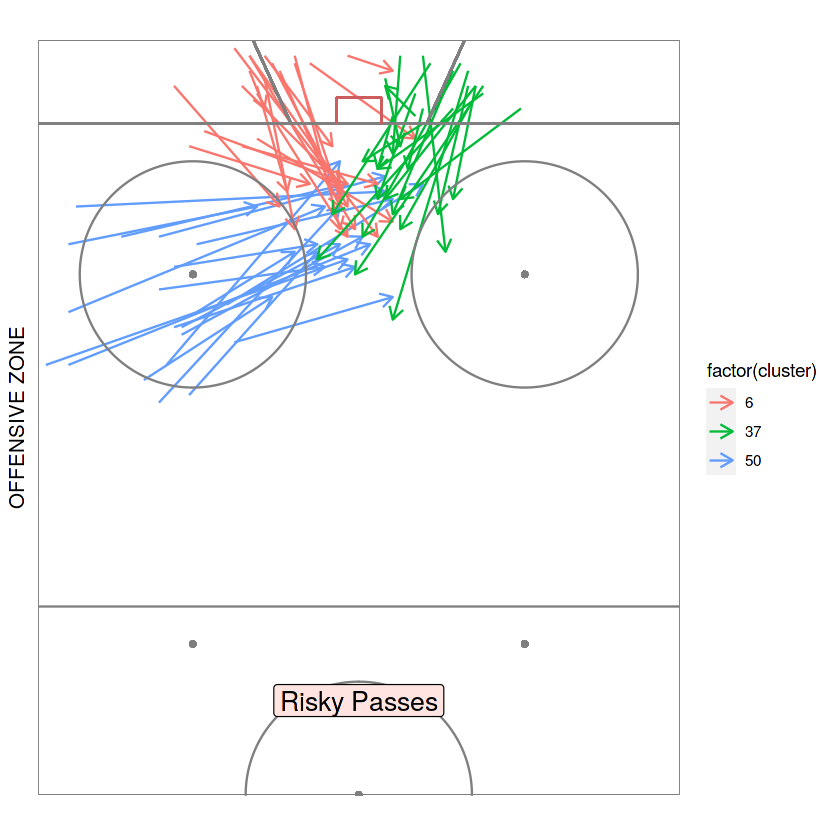

In [8]:
cat("Risky passes: ")
print(risky_passes_plot)

Safe passes: 

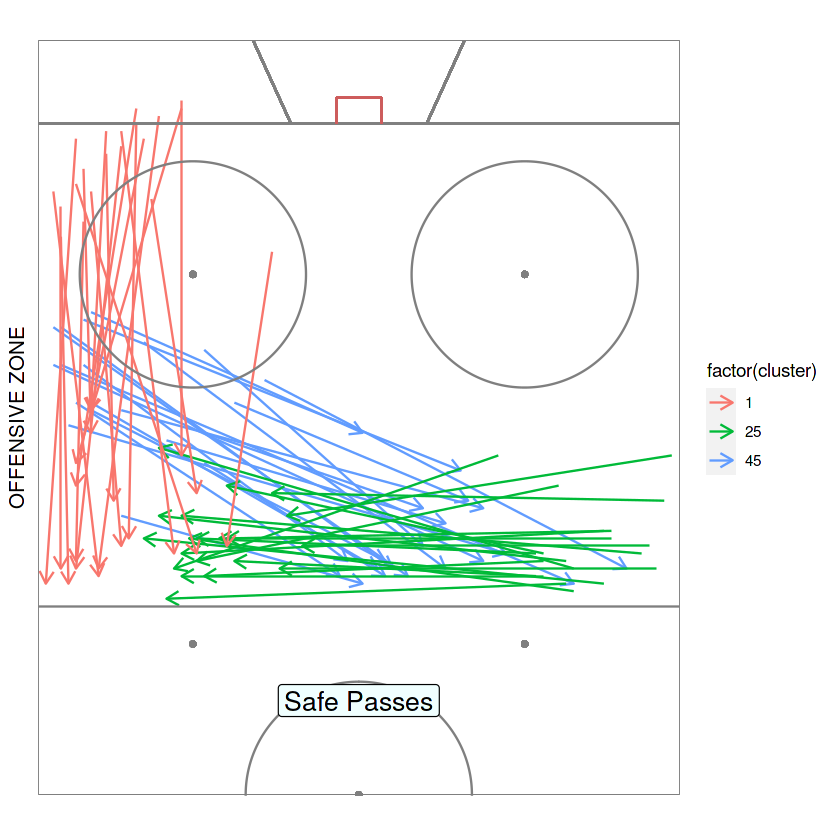

In [9]:
cat("Safe passes: ")
print(safe_passes_plot)

As we can see risky passes are close to the goal while the safe passes are away from the goal

In [ ]:
library(gganimate)

anim <- risky_passes_plot + 
                      transition_states(Clock)

anim

In [60]:
sqrt(55^2 + 31.5^2)

[1] 63.38178

## Visualizing the Passes of Taylor woods

In [12]:
passes_players_df <- nhwl_plays_df[nhwl_plays_df$Player == 'Mallory Souliotis',]
head(passes_players_df)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,X.Coordinate.2,Y.Coordinate.2,start_x,start_y,end_x,end_y,delta_x,delta_y,is_complete,cluster
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>
31,2021-01-23,Minnesota Whitecaps,Boston Pride,1,11:28,4,5,0,0,Boston Pride,⋯,140,71,11,145,71,140,60,-5,1,12
37,2021-01-23,Minnesota Whitecaps,Boston Pride,1,10:47,5,5,0,0,Boston Pride,⋯,161,37,59,163,37,161,-22,-2,1,15
42,2021-01-23,Minnesota Whitecaps,Boston Pride,1,9:31,4,5,0,0,Boston Pride,⋯,150,5,27,128,5,150,-22,22,0,36
124,2021-01-23,Minnesota Whitecaps,Boston Pride,2,1:56,4,5,2,1,Boston Pride,⋯,131,59,21,138,59,131,38,-7,1,16
127,2021-01-23,Minnesota Whitecaps,Boston Pride,2,1:47,4,5,2,1,Boston Pride,⋯,189,18,12,189,18,189,6,0,1,10
128,2021-01-23,Minnesota Whitecaps,Boston Pride,2,1:37,4,5,2,1,Boston Pride,⋯,177,40,9,171,40,177,31,6,0,50


In [61]:
passes_players_df <- transform(passes_players_df, square_start_x=(42.5-start_x)^2)
passes_players_df <- transform(passes_players_df, square_start_y=(200-start_y)^2)
passes_players_df <- transform(passes_players_df, distance = sqrt(square_start_x + square_start_y))
head(passes_players_df)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,end_x,end_y,delta_x,delta_y,is_complete,cluster,startx,distance,square_start_x,square_start_y
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
31,2021-01-23,Minnesota Whitecaps,Boston Pride,1,11:28,4,5,0,0,Boston Pride,⋯,71,140,60,-5,1,5,11,63.38178,992.25,3025
37,2021-01-23,Minnesota Whitecaps,Boston Pride,1,10:47,5,5,0,0,Boston Pride,⋯,37,161,-22,-2,1,3,59,40.51234,272.25,1369
42,2021-01-23,Minnesota Whitecaps,Boston Pride,1,9:31,4,5,0,0,Boston Pride,⋯,5,150,-22,22,0,4,27,73.64951,240.25,5184
124,2021-01-23,Minnesota Whitecaps,Boston Pride,2,1:56,4,5,2,1,Boston Pride,⋯,59,131,38,-7,1,5,21,65.62202,462.25,3844
127,2021-01-23,Minnesota Whitecaps,Boston Pride,2,1:47,4,5,2,1,Boston Pride,⋯,18,189,6,0,1,2,12,32.42299,930.25,121
128,2021-01-23,Minnesota Whitecaps,Boston Pride,2,1:37,4,5,2,1,Boston Pride,⋯,40,177,31,6,0,2,9,44.30858,1122.25,841


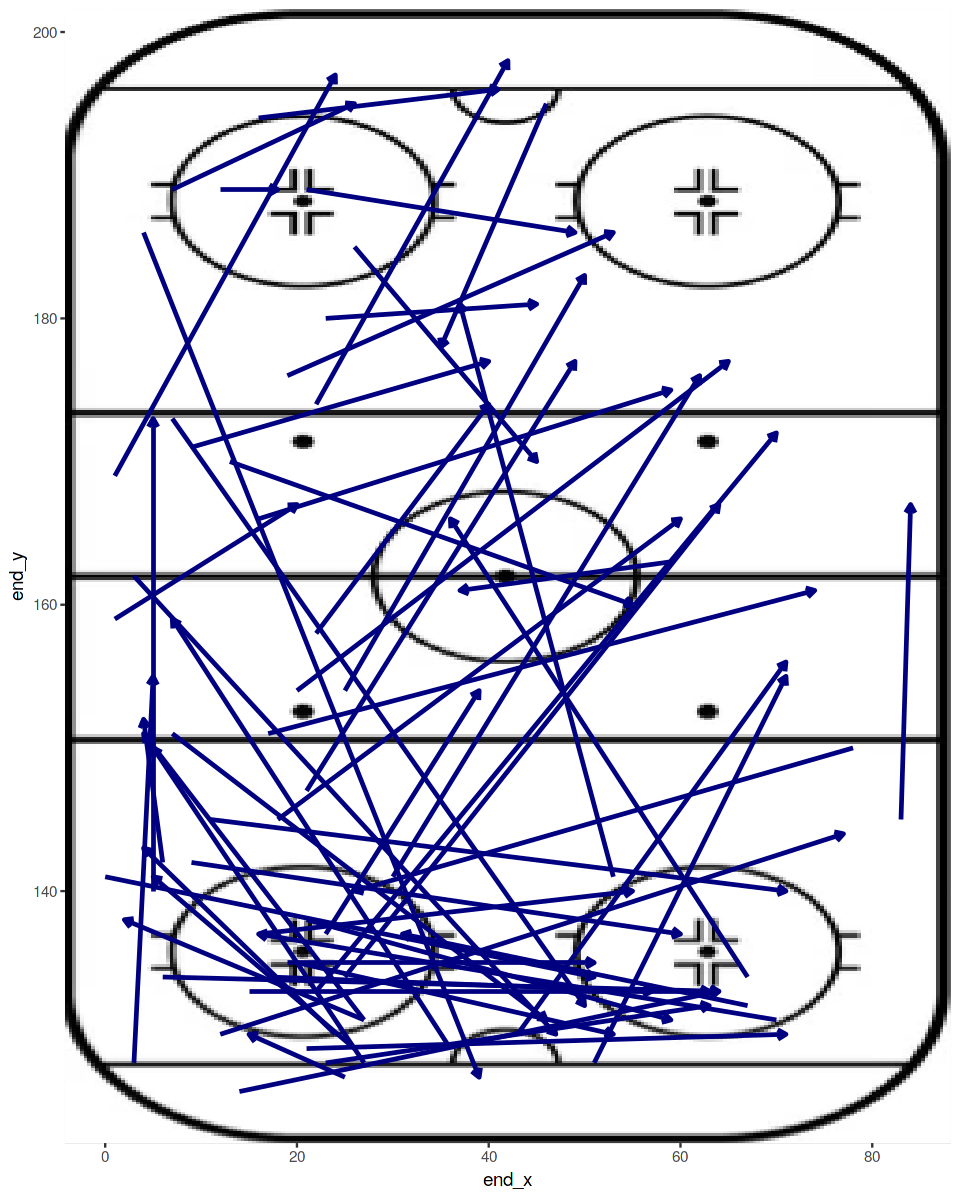

In [85]:
options(repr.plot.width = 8, repr.plot.height = 10)


taylor_passes_plot <- ggplot(data = passes_players_df, aes(end_x, end_y), colour = factor(distance)) + 
    background_image(image3) +
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.2, "cm")),size=1, colour="#000080") +
scale_colour_brewer(type = "div")

# ggplot(Oxy[1:4,], aes(x = Pupil, y = DrugConc, colour = factor(Time), size = factor(Time))) +
#   geom_point() +
#   geom_segment(aes(x = Xstart, xend = Xend, y = Ystart, yend = Yend),
#                arrow = arrow(length = unit(8, "points"), type = "open")) +
#   scale_colour_brewer(type = "div")


#   geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
#                arrow = arrow(length = unit(0.3, "cm"))) +
#   geom_circle(data = data.frame(x0 = 42.5, y0 = 100, r = 15), aes(x0 = x0, y0 = y0, r = r), 
#               lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
#   geom_circle(data = data.frame(x0 = 20.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
#               lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
#   geom_circle(data = data.frame(x0 = 64.5, y0 = 169, r = 15), aes(x0 = x0, y0 = y0, r = r),
#               lwd = 0.5, col = "gray50", inherit.aes = FALSE) +
#   geom_point(inherit.aes = FALSE, aes(x = 42.5, y = 100),
#              col = "gray50", size = 1) +
#   geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 169),
#              col = "gray50", size = 1) +
#   geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 169),
#              col = "gray50", size = 1) +
#   geom_point(inherit.aes = FALSE, aes(x = 20.5, y = 120),
#              col = "gray50", size = 1) +
#   geom_point(inherit.aes = FALSE, aes(x = 64.5, y = 120),
#              col = "gray50", size = 1) +
#   geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 0, y = 189, xend = 85, yend = 189)) +
#   geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 45.5, yend = 192.5)) + 
#   geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 39.5, y = 192.5, xend = 39.5, yend = 189)) +  
#   geom_segment(col = "indianred", inherit.aes = FALSE, lwd = 0.5, aes(x = 45.5, y = 192.5, xend = 45.5, yend = 189)) +
#   geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 33.5, y = 189, xend = 28.5, yend = 200)) +
#   geom_segment(col = "gray50", inherit.aes = FALSE, lwd = 0.5, aes(x = 51.5, y = 189, xend = 56.5, yend = 200)) +
#   geom_hline(col = "gray50", yintercept = 125, lwd = 0.5) +
#   scale_x_continuous(expand = c(0, 0)) + scale_y_continuous(expand = c(0,0)) +
#   ylab("OFFENSIVE ZONE") +
#   theme(axis.title.x=element_blank(),
#         axis.text.x=element_blank(),
#         axis.ticks.x=element_blank(),
#         axis.title.y = element_text(size=12),
#         axis.text.y=element_blank(),
#         axis.ticks.y=element_blank(), 
#         panel.grid.major = element_blank(), 
#         panel.grid.minor = element_blank(),
#         panel.background = element_blank(),
#         panel.border = element_rect(colour = "gray50", fill=NA, size=0.2)) +
#   coord_fixed(xlim = c(0,85), ylim = c(100,200)) +
#   annotate("label", x = 42.5, y = 112.5, label = "Mallory Passes", size = 5.5, fill = "azure")

taylor_passes_plot

In [ ]:
save.image(file = "taylor_pass_distribution.Rdata", oldstyle = FALSE)

In [ ]:
library(gganimate)

anim <- taylor_passes_plot + transition_states(end_x)

anim

In [14]:
cluster_taylor_passes <- kmeans(passes_players_df %>% dplyr::select(start_x: delta_y), centers = 5)
passes_players_df$cluster <- cluster_taylor_passes$cluster
cluster_taylor_passes

K-means clustering with 5 clusters of sizes 4, 17, 7, 10, 23

Cluster means:
   start_x  start_y    end_x    end_y   delta_x    delta_y
1  5.25000 168.0000 45.50000 130.0000  40.25000 -38.000000
2 17.64706 174.4118 40.64706 181.7059  23.00000   7.294118
3 68.14286 142.2857 38.14286 155.5714 -30.00000  13.285714
4 20.60000 131.5000  5.60000 149.2000 -15.00000  17.700000
5 19.69565 136.5217 62.39130 146.4783  42.69565   9.956522

Clustering vector:
  31   37   42  124  127  128  151  157  545  567  569  588  616  707  721 1164 
   5    3    4    5    2    2    2    2    5    5    1    4    4    2    4    2 
1175 1277 1279 1285 1317 1354 1359 1365 1592 1623 1645 1669 1690 1699 1719 1722 
   2    5    5    2    4    2    3    3    5    5    3    4    2    5    5    2 
1775 2052 2091 2110 2198 2200 2467 2470 2471 2503 2508 2511 2516 2542 2603 2606 
   5    5    2    1    2    5    2    5    1    5    3    2    5    4    4    5 
2808 2879 2881 2884 2947 2959 2961 2962 2965 2974 2976 2979 298

In [15]:
cluster_summary <- passes_players_df %>%
                      group_by(cluster) %>%
                      summarise(total_passes = n(),
                      comp_rate = mean(is_complete))


risky_passes <- (cluster_summary %>%
                   arrange(comp_rate) %>%
                   .$cluster)[1:5]

safe_passes <- (cluster_summary %>%
                   arrange(desc(comp_rate)) %>%
                   .$cluster)[1:3]

risky_passes

[1] 2 3 4 5 1

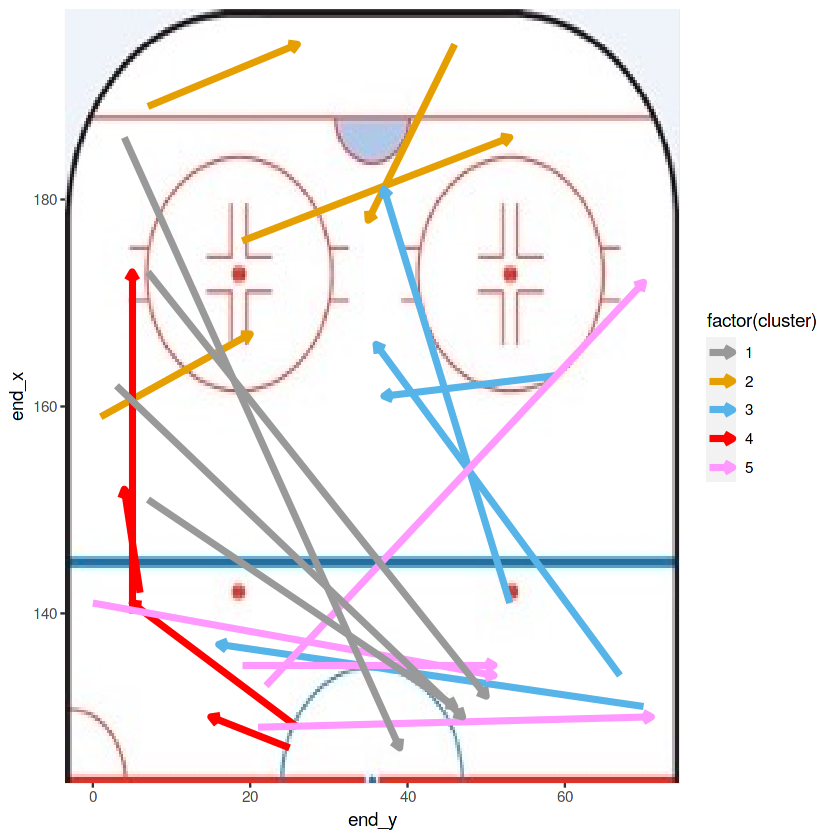

In [33]:
library(grid)
library(ggpubr)
#library(gggenes)
library(raster)
library(png)

risky_dat <- bind_rows(passes_players_df %>%
                         filter(cluster == risky_passes[1]) %>%
                         sample_n(4, replace = FALSE),
                       passes_players_df %>%
                         filter(cluster == risky_passes[2]) %>%
                         sample_n(4, replace = FALSE),
                       passes_players_df %>%
                         filter(cluster == risky_passes[3]) %>%
                         sample_n(4, replace = FALSE),
                      passes_players_df %>%
                         filter(cluster == risky_passes[4]) %>%
                         sample_n(4, replace = FALSE),
                      passes_players_df %>%
                         filter(cluster == risky_passes[5]) %>%
                         sample_n(4, replace = FALSE))


risky_passes_plot <- ggplot(data = risky_dat, aes(end_y, end_x, col = factor(cluster))) + 
  background_image(image) +
  geom_segment(aes(x = start_x, y = start_y, xend = end_x, yend = end_y),
               arrow = arrow(length = unit(0.2, "cm")), size=1.5) +
  scale_fill_continuous(guide = FALSE) +
  scale_color_manual(values=c('#999999','#E69F00', '#56B4E9', '#ff0000', '#ff99ff'))

risky_passes_plot

In [86]:
save.image(file = "taylor_plays.Rdata", oldstyle = FALSE)

ERROR: Error in save.image(file = "taylor_plays.Rdata", oldstyle = FALSE): unused argument (oldstyle = FALSE)


In [87]:
library(gganimate)

anim <- risky_passes_plot + transition_states(end_x)

anim


Attaching package: ‘gganimate’


The following object is masked from ‘package:raster’:

    animate




## Goal Clustering

In [18]:
nhwl_shots_df <- nhwl_df %>%
  filter(Event %in% c("Shot", "Goal"), X.Coordinate >= 125) %>%
  mutate(start_x = Y.Coordinate,
         start_y = X.Coordinate,
         is_complete = ifelse(Event == "Goal", 1, 0))

head(nhwl_shots_df,10)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2,start_x,start_y,is_complete
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,t,f,,NA,NA,28,131,0
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:21,5,5,0,0,Minnesota Whitecaps,⋯,Snapshot,On Net,f,f,,NA,NA,2,162,0
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:07,5,5,0,0,Minnesota Whitecaps,⋯,Snapshot,Missed,f,f,,NA,NA,18,167,0
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:34,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,68,175,0
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:26,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,20,196,0
6,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:50,5,5,0,0,Minnesota Whitecaps,⋯,Snapshot,On Net,f,f,,NA,NA,43,181,0
7,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:18,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,10,163,0
8,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:15,5,5,0,0,Boston Pride,⋯,Wrap Around,On Net,f,f,,NA,NA,49,188,0
9,2021-01-23,Minnesota Whitecaps,Boston Pride,1,15:56,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,19,149,0


In [22]:
## Subsetting for player
taylor_shots_df <- nhwl_shots_df[nhwl_shots_df$Player == 'Mallory Souliotis', ]
head(taylor_shots_df)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2,start_x,start_y,is_complete
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
27,2021-01-23,Minnesota Whitecaps,Boston Pride,1,6:02,5,5,0,1,Boston Pride,⋯,Fan,Missed,t,t,,NA,NA,44,145,0
40,2021-01-23,Minnesota Whitecaps,Boston Pride,1,2:45,4,5,1,1,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,23,177,0
50,2021-01-23,Minnesota Whitecaps,Boston Pride,2,16:36,5,5,1,1,Boston Pride,⋯,Slapshot,Blocked,t,t,,NA,NA,29,146,0
53,2021-01-23,Minnesota Whitecaps,Boston Pride,2,15:21,4,5,1,1,Boston Pride,⋯,Wristshot,Missed,t,f,,NA,NA,26,139,0
56,2021-01-23,Minnesota Whitecaps,Boston Pride,2,15:01,4,5,1,1,Boston Pride,⋯,Wristshot,Blocked,t,f,,NA,NA,74,161,0
90,2021-01-23,Minnesota Whitecaps,Boston Pride,3,17:42,5,5,2,1,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,69,173,0


In [23]:
dim(taylor_shots_df)

[1] 35 24

In [24]:
cluster_taylor_goals <- kmeans(taylor_shots_df %>% dplyr::select(start_x: start_y), centers = 3)
taylor_shots_df$cluster <- cluster_taylor_goals$cluster
cluster_taylor_goals

K-means clustering with 3 clusters of sizes 21, 9, 5

Cluster means:
   start_x  start_y
1 22.38095 139.4286
2 23.00000 165.0000
3 72.80000 153.4000

Clustering vector:
  27   40   50   53   56   90  115  408  805  882  898  913 1079 1094 1101 1154 
   1    2    1    1    3    3    1    1    2    1    1    3    1    3    1    1 
1158 1382 1419 1424 1464 1471 1614 1615 1654 1676 1704 1726 1731 1737 1871 1898 
   1    3    2    1    2    1    2    1    2    2    1    2    1    1    2    1 
1925 1943 1957 
   1    1    1 

Within cluster sum of squares by cluster:
[1] 3304.095 1090.000 1564.000
 (between_SS / total_SS =  71.7 %)

Available components:

[1] "cluster"      "centers"      "totss"        "withinss"     "tot.withinss"
[6] "betweenss"    "size"         "iter"         "ifault"      

In [25]:
cluster_summary <- taylor_shots_df %>%
                  group_by(cluster) %>%
                  summarise(total_passes = n(),
                  comp_rate = mean(is_complete))

all_shots <- (cluster_summary %>%
                   arrange(comp_rate) %>%
                   .$cluster)[1:3]


In [26]:
cluster_summary

cluster,total_passes,comp_rate
<int>,<int>,<dbl>
1,21,0.0952381
2,9,0.1111111
3,5,0.0000000


In [28]:
goals_data <- bind_rows(taylor_shots_df %>%
                         filter(cluster == all_shots[1]) %>%
                         sample_n(5, replace = FALSE),
                       taylor_shots_df %>%
                         filter(cluster == all_shots[2]) %>%
                         sample_n(5, replace = FALSE),
                       taylor_shots_df %>%
                         filter(cluster == all_shots[3]) %>%
                         sample_n(5, replace = FALSE))
#                       taylor_shots_df %>%
#                          filter(cluster == all_shots[4]) %>%
#                          sample_n(5, replace = FALSE),
#                       taylor_shots_df %>%
#                          filter(cluster == all_shots[5]) %>%
#                          sample_n(5, replace = FALSE))


shots_plot <- ggplot(data = goals_data, aes(start_y, start_x, col = factor(cluster))) + 
  background_image(image) +
  geom_point(aes(x = start_x, y = start_y, col=factor(cluster)), size=5, stroke=1) + 
  #ggforce::geom_mark_ellipse(aes(start_y, start_x, group = cluster, label = cluster), inherit.aes=FALSE) +
  #             arrow = arrow(length = unit(0.2, "cm")), size=1.5) +
  scale_fill_continuous(guide = FALSE) +
  scale_color_manual(values=c('#999999','#E69F00', '#56B4E9', '#ff0000', '#ff99ff'))

#shots_plot + ggforce::geom_mark_ellipse(aes(start_y, start_x, group = cluster, label = cluster), inherit.aes=TRUE)
shots_plot

ERROR: Error in UseMethod("as.raster"): no applicable method for 'as.raster' applied to an object of class "c('standardGeneric', 'genericFunction', 'function', 'OptionalFunction', 'PossibleMethod', 'functionOrNULL', 'optionalMethod')"


Thus shots near the goal can have higher expected goal rate. Could be used for improvement of player.

Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



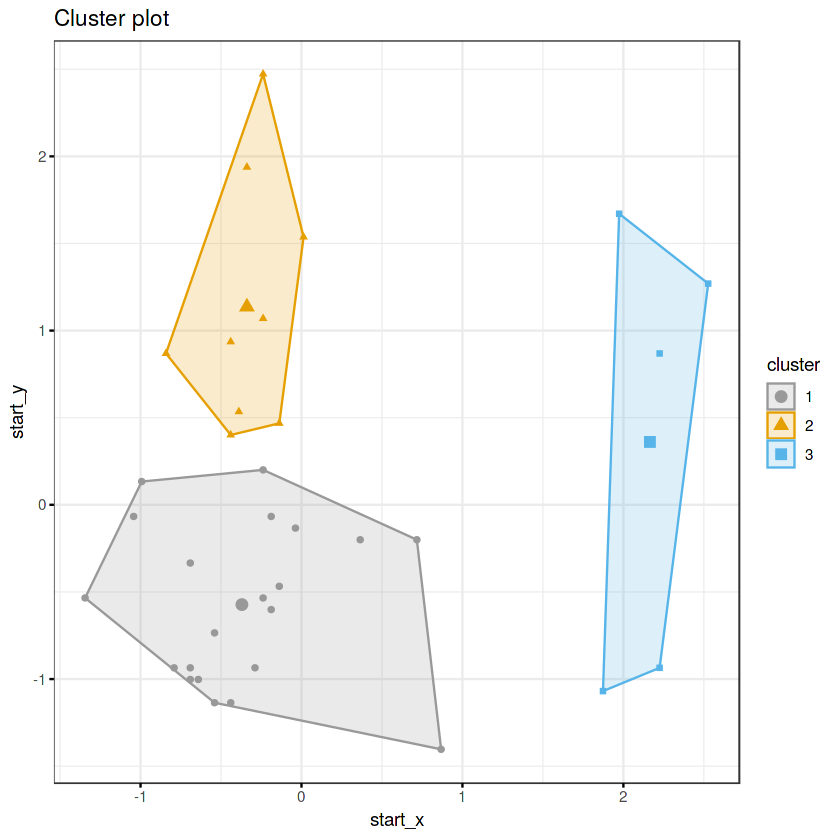

In [29]:
library(factoextra)
p <- fviz_cluster(cluster_taylor_goals, taylor_shots_df %>% dplyr::select(start_x: start_y), 
             #aes(start_y, start_x, col = factor(cluster)),
             palette = c('#999999','#E69F00', '#56B4E9', '#ff0000', '#ff99ff'), 
             geom = "point",
             ellipse.type = "convex", 
             ggtheme = theme_bw()
             ) 

p

## Density Plot of Goals and Shots

In [30]:
head(nhwl_shots_df)

,game_date,Home.Team,Away.Team,Period,Clock,Home.Team.Skaters,Away.Team.Skaters,Home.Team.Goals,Away.Team.Goals,Team,⋯,Detail.1,Detail.2,Detail.3,Detail.4,Player.2,X.Coordinate.2,Y.Coordinate.2,start_x,start_y,is_complete
,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,⋯,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<int>,<dbl>
1,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:55,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,t,f,,NA,NA,28,131,0
2,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:21,5,5,0,0,Minnesota Whitecaps,⋯,Snapshot,On Net,f,f,,NA,NA,2,162,0
3,2021-01-23,Minnesota Whitecaps,Boston Pride,1,19:07,5,5,0,0,Minnesota Whitecaps,⋯,Snapshot,Missed,f,f,,NA,NA,18,167,0
4,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:34,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,68,175,0
5,2021-01-23,Minnesota Whitecaps,Boston Pride,1,18:26,5,5,0,0,Boston Pride,⋯,Snapshot,On Net,f,f,,NA,NA,20,196,0
6,2021-01-23,Minnesota Whitecaps,Boston Pride,1,16:50,5,5,0,0,Minnesota Whitecaps,⋯,Snapshot,On Net,f,f,,NA,NA,43,181,0


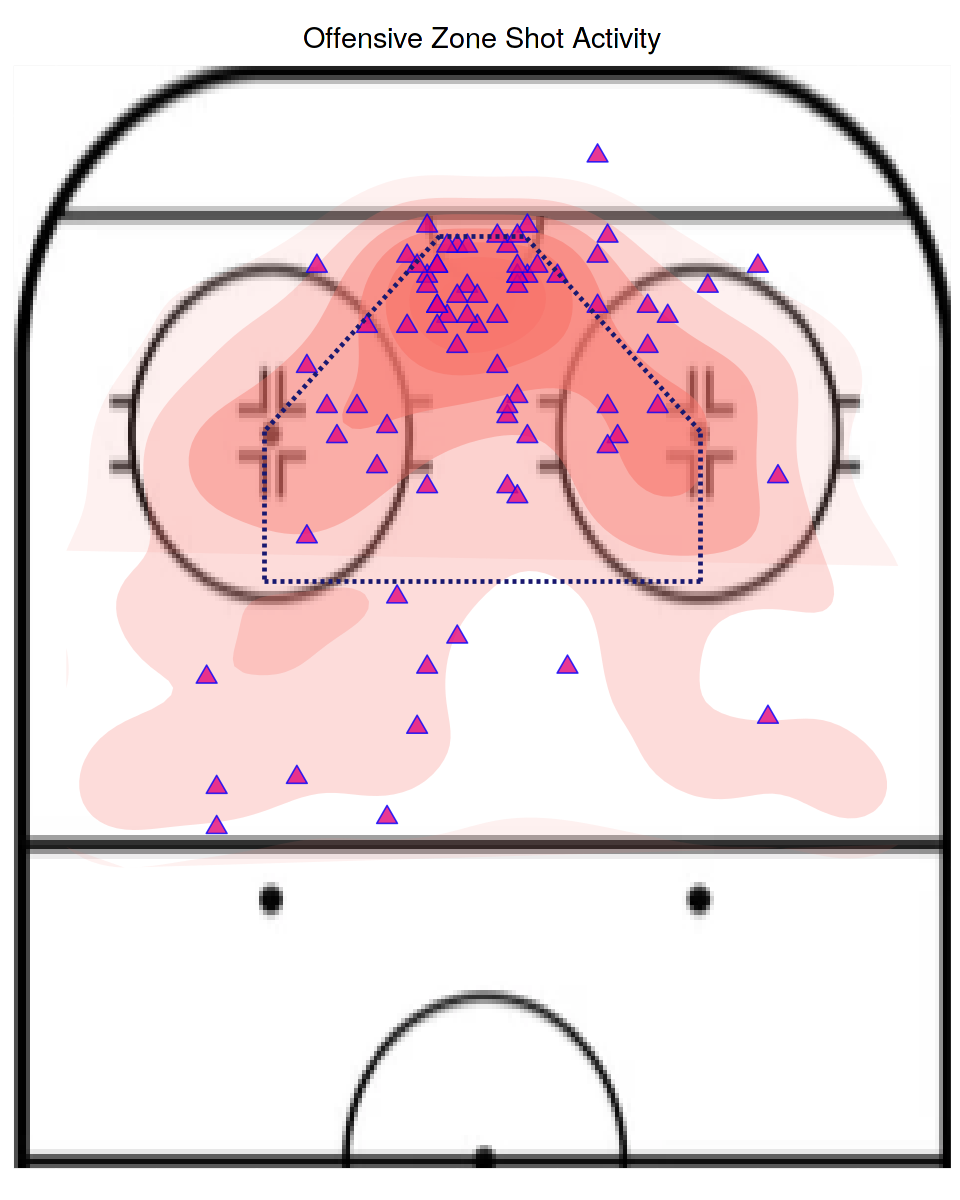

In [88]:
p <- ggplot(data = nhwl_shots_df, aes(x = start_x, y = start_y)) + # x and y are location on rink
            
            #  plot rink
#             annotation_raster(image, xmin = 0, xmax = 85, ymin = 100, ymax = 200) +
#             scale_x_continuous(limits = c(0,85), expand = c(0,0)) +
#             scale_y_continuous(limits = c(100,200), expand = c(0,0)) + # base amount should work by here
            background_image(image2)+
            #  add density for shots distribution
#             stat_density_2d(geom = "polygon", aes(alpha = stat(level)), fill = "royalblue4", alpha = 0.2, col = "white", bins = 8) +
            stat_density_2d(geom = "polygon",
                  aes(alpha = ..level.., fill = "#27408B"),
                  bins = 8) +
            ## adding points for goals
            geom_point(data = nhwl_shots_df %>% filter(is_complete == TRUE), fill="#E20778", colour = "blue", size = 4, shape = 24, alpha = 0.8) +
                
            theme(axis.title.x = element_blank(),
                  axis.text.x = element_blank(),
                  axis.ticks.x =element_blank(),
                  axis.title.y = element_blank(),
                  axis.text.y = element_blank(),
                  axis.ticks.y = element_blank(),
                  plot.title = element_text(hjust = 0.5, size = 17),
                  plot.subtitle = element_text(hjust = 0.5, size = 12),
                  legend.position ="none") +
            
            ggtitle("Offensive Zone Shot Activity") +
            # labs(title = "Offensive Zone Shot Activity", subtitle = subtitle(), caption = caption()) +
            # subtitle with team name focused on + game
            
            coord_fixed(xlim = c(0, 85), ylim = c(100, 200)) +
            
            # geom_rect(aes(xmin = 10, xmax = 75, ymin = 103, ymax = 110), colour = "black", size = 1, fill = "lightblue") +
            # annotate("text", label = "Expected Shooting %: 6.3%", x = 42.5, y = 107, size = 5) +
            
            geom_segment(data = data.frame(x = c(38.25, 38.25, 20.75, 20.75, 64.25, 64.25),
                                           y = c(188, 188, 168.5, 153.5, 153.5, 168.5),
                                           xend = c(46.75, 20.75, 20.75, 64.25, 64.25, 46.75),
                                           yend = c(188, 168.5, 153.5, 153.5, 168.5, 188)),
                         aes(x = x, y = y, xend = xend, yend = yend),
                         size = 1, col = "midnightblue", linetype = 2)

p

In [ ]:
save.image(file = "goals_density_plot.Rdata", oldstyle = FALSE)